# Map analysis

Analyse the maps of the different malls.

In [59]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

from IPython.display import Image

## Import data
The shoppers file given to us is called bag_mus_12-22-2016.csv. 

In [2]:
shopper_df = pd.read_csv('../data/bag_mus_12-22-2016.csv')

# Turn date time to datetime64[ns] format
shopper_df.date_time = shopper_df.date_time.astype('datetime64[ns]')

## Different malls

In [3]:
shopper_df.location.value_counts()

Mall of Mauritius    2762923
Phoenix Mall         1617170
Home & Leisure        105856
Name: location, dtype: int64

In [4]:
mauritius_df = shopper_df[shopper_df.location == 'Mall of Mauritius']
phoenix_df = shopper_df[shopper_df.location == 'Phoenix Mall']
home_df = shopper_df[shopper_df.location == 'Home & Leisure']

### Mall of Mauritius

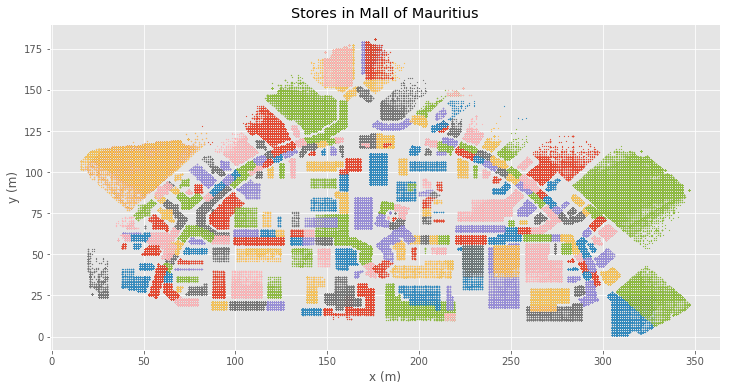

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

mauritius_store_group = mauritius_df[mauritius_df.store_id.notnull()].groupby('store_id')
for key, group in mauritius_store_group:
    axes.scatter(group['x'], group['y'], s=0.5)
    
axes.set_title('Stores in Mall of Mauritius')
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)');

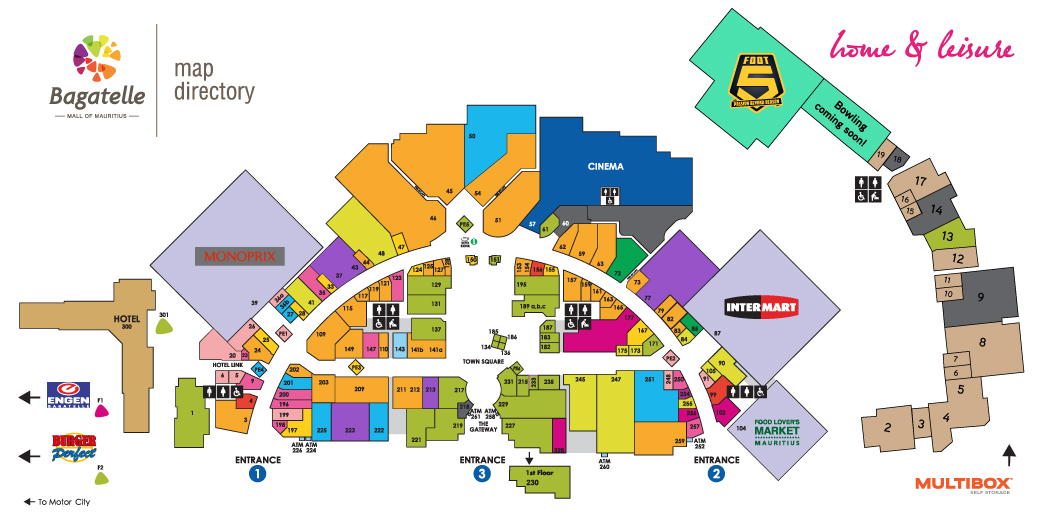

In [10]:
Image("../images/mall_of_mauritius_map.jpg", width=900)

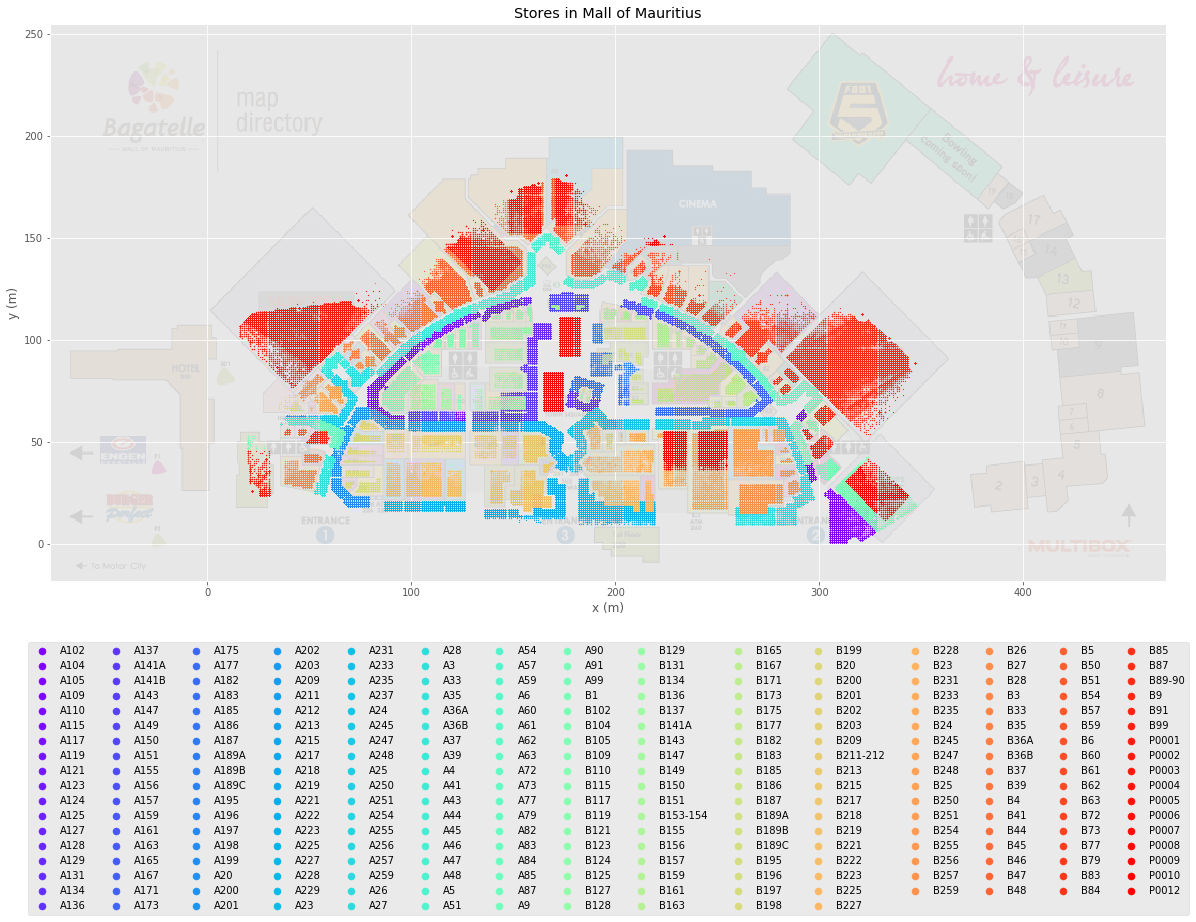

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

img = mpimg.imread("../images/mall_of_mauritius_map.png")
axes.imshow(img[::-1], origin='lower', extent=[-77,470,-18,255], alpha=0.1)

mauritius_store_group = mauritius_df[mauritius_df.store_id.notnull()].groupby('store_id')
colors = iter(cm.rainbow(np.linspace(0, 1, len(mauritius_store_group))))
for key, group in mauritius_store_group:
    axes.scatter(group['x'], group['y'], s=0.5, color=next(colors), label=key)
    
axes.set_title('Stores in Mall of Mauritius')
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)')
axes.legend(loc='upper center', markerscale=10., ncol=15, bbox_to_anchor=(0.5, -0.1));

### Home & Leisure

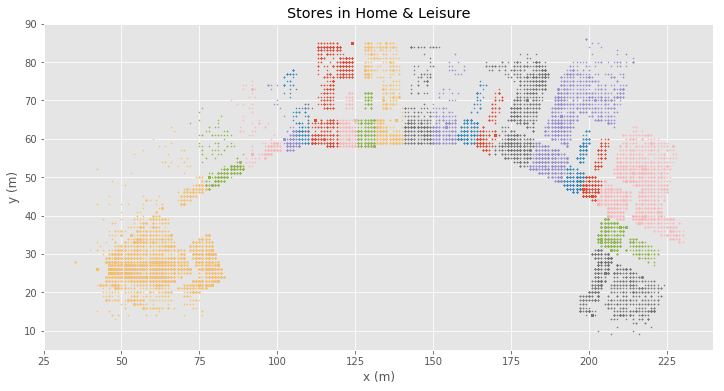

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

home_store_group = home_df[home_df.store_id.notnull()].groupby('store_id')
for key, group in home_store_group:
    axes.scatter(group['x'], group['y'], s=1)
    
axes.set_title('Stores in Home & Leisure')
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)');

### Phoenix Mall

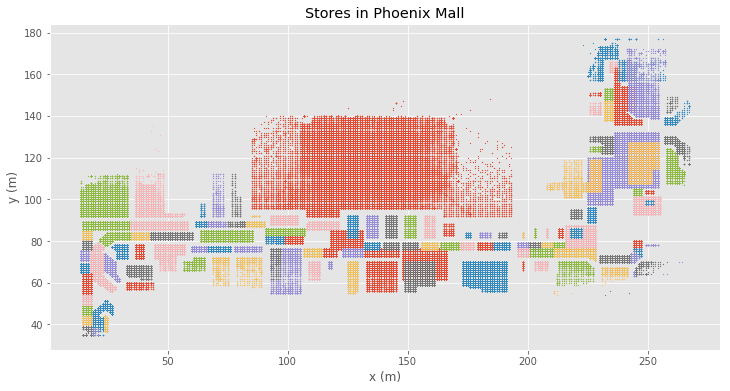

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

phoenix_store_group = phoenix_df[phoenix_df.store_id.notnull()].groupby('store_id')
for key, group in phoenix_store_group:
    axes.scatter(group['x'], group['y'], s=0.5)
    
axes.set_title('Stores in Phoenix Mall')
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)');